In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8) #Adjusts the configuration of the plots



In [2]:
#Read the data
df=pd.read_csv(r'C:\Users\USER\Documents\movies.csv')

In [3]:
#View of the first 5 rows
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Check for missing data if any
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [5]:
#Check the data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
#Checking basic info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
#Dropping Null values
df.dropna(inplace=True)

In [8]:
#Changing the data types of some columns from float to integer
df[['score','votes','budget','gross','runtime']] = df[['score','votes','budget','gross','runtime']].astype('int64')


In [9]:
#Viewing the last 5 rows
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6,3700,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149


In [10]:
#Order/Sort values by the gross column from the highest to the lowest
#pd.set_option('display.max_rows',None) ~ Incase you want to view all the rows


df.sort_values(by=['gross'], inplace = False, ascending=False).head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103


##### The above are the top 10 movies with the highest gross income

In [11]:
#Number of movies produced each year
movies_per_year=df["year"].value_counts()
movies_per_year


year
2002    173
2009    171
2008    171
2005    170
2001    164
2010    164
2014    163
2006    163
2000    162
2012    162
1999    162
2013    161
2011    160
2003    159
2016    158
2004    158
2007    157
2015    156
1997    149
1998    148
1996    144
2018    143
1993    140
1995    138
2017    133
1992    131
1988    130
1994    128
1989    115
2019    113
1991    113
1990    111
1987    104
1986     99
1985     95
1984     88
1983     83
1982     71
1981     63
1980     40
2020      8
Name: count, dtype: int64

In [13]:
#Average budget and gross per year
avg_per_year=df.groupby("year")[["budget","gross"]].mean()
avg_per_year[["budget","gross"]].astype(int)#

,budget,gross
year,,
1980,11566250,44291963
1981,10998412,29186625
1982,11767253,38043930
1983,10695168,27969266
1984,12609147,33969537
1985,12718526,34036733
1986,12754417,29649299
1987,13140073,32286875
1988,13287153,33475531


In [14]:
#Top 10 years with the highest budget
avg_per_year.nlargest(10,"budget").astype(int)


,budget,gross
year,,
2020,107687500,284112727
2019,58734070,245067834
2017,55712030,208118816
2016,55601265,176250406
2013,50320931,159625248
2011,49179562,149801912
2018,49041818,192716927
2012,47761080,155232763
2015,46921321,168057139


In [15]:
#Top 10 years with the highest gross
avg_per_year.nlargest(10,"gross").astype(int)

,budget,gross
year,,
2020,107687500,284112727
2019,58734070,245067834
2017,55712030,208118816
2018,49041818,192716927
2016,55601265,176250406
2015,46921321,168057139
2014,45731901,160730204
2013,50320931,159625248
2012,47761080,155232763


#### In recent years, the budget is high which in turn results in a high gross also

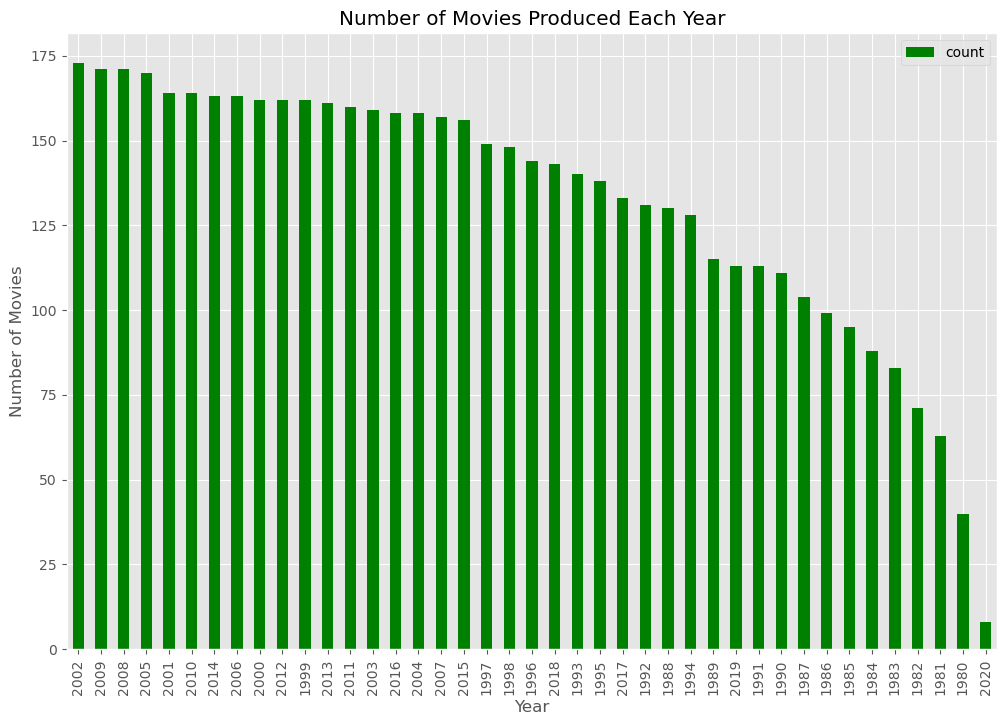

In [16]:
#Visualization of the number of movies per year
movies_per_year.plot(kind='bar', x='Year', y='Number_of_Movies', legend=True,color="green")
plt.title('Number of Movies Produced Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [17]:
#A count of movies based on their genre
movies_genre_count=df["genre"].value_counts()
movies_genre_count

genre
Comedy       1496
Action       1415
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     277
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: count, dtype: int64

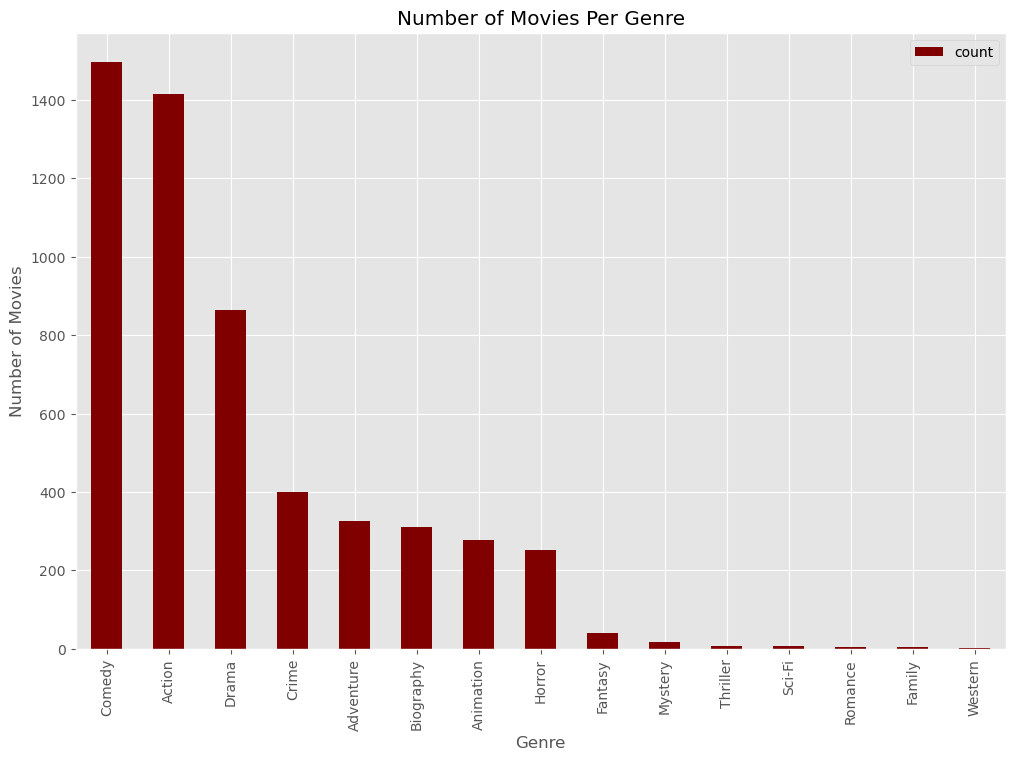

In [18]:
#Visualization of count of movies based on their genre
movies_genre_count.plot(kind='bar', x='genre', y='Number_of_Movies', legend=True,color="maroon")
plt.title('Number of Movies Per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

In [19]:
#Average amount spent and gotten from each movie genre
avg_per_genre=df.groupby("genre")[["budget","gross"]].mean()
avg_per_genre.astype(int)

,budget,gross
genre,,
Action,58468560,168023228
Adventure,45958899,133268232
Animation,76323357,281104365
Biography,25441668,61395274
Comedy,22802371,59167658
Crime,22602897,50169579
Drama,23241877,60369136
Family,51125000,518583146
Fantasy,17224390,39878697


In [20]:
#Checking for the genre with the highest budget
avg_per_genre[["budget","gross"]].astype(int).sort_values(by="budget",ascending=False)

,budget,gross
genre,,
Animation,76323357,281104365
Action,58468560,168023228
Family,51125000,518583146
Adventure,45958899,133268232
Mystery,31876470,117887733
Biography,25441668,61395274
Sci-Fi,24416666,37610102
Romance,24040000,33575381
Drama,23241877,60369136


#### More money is required in the making of Animation movies as opposed to other genres. Action movies and Family movies follow suit.

In [21]:
#Checking for the genre with the highest gross
avg_per_genre[["budget","gross"]].astype(int).sort_values(by="gross",ascending=False)

,budget,gross
genre,,
Family,51125000,518583146
Animation,76323357,281104365
Action,58468560,168023228
Adventure,45958899,133268232
Mystery,31876470,117887733
Biography,25441668,61395274
Drama,23241877,60369136
Comedy,22802371,59167658
Horror,13434529,56816952


#### The top 6 genres with the highest budget still maintain top 6 as to the gross income with the Family genre topping the chat while Animation and Action movie genre followed suit and Adventure, Mystery and Biography maintain  their positions respectively.

In [22]:
#basic statistics of the data
df.describe().astype(int)

,year,score,votes,budget,gross,runtime
count,5421,5421,5421,5421,5421,5421
mean,2001,5,115066,36009170,103229653,108
std,10,1,184407,41573373,187302717,18
min,1980,1,195,6000,309,63
25%,1993,5,19000,10000000,10736401,95
50%,2002,6,52000,21800000,36869414,105
75%,2011,7,129000,45000000,112462508,118
max,2020,9,2400000,356000000,-2147483648,271


In [23]:
#Checking for correlation between budget and gross
df["budget"].corr(df['gross'])

0.7402465439219631

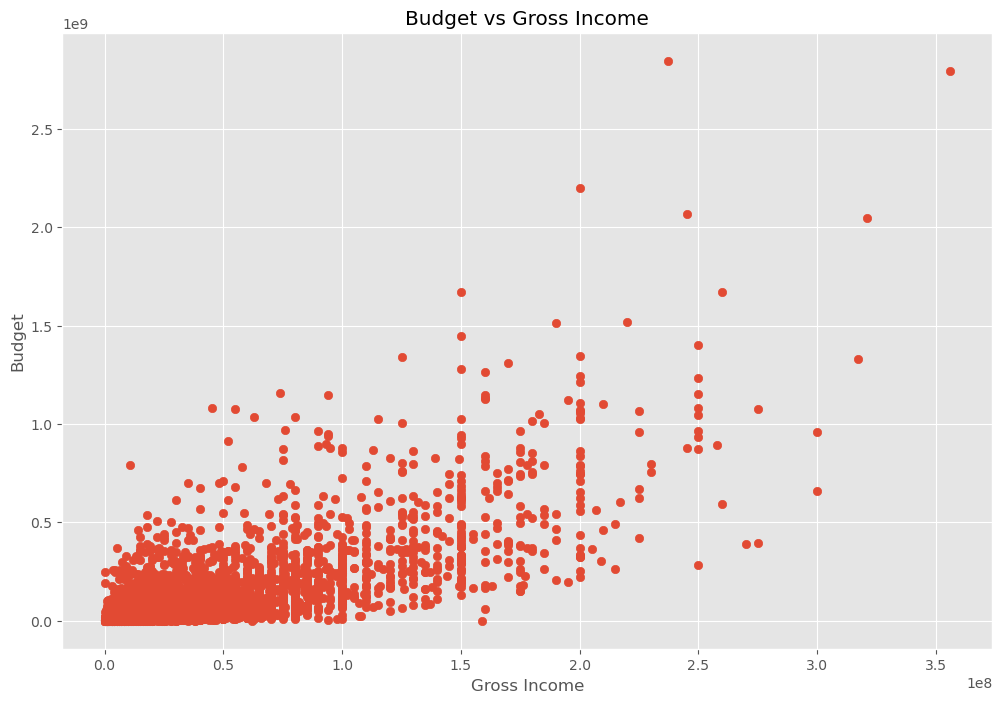

In [24]:
#Visualization of the correlation using a scatterd plot
plt.scatter(x=df["budget"],y=df["gross"])
plt.title("Budget vs Gross Income")
plt.xlabel("Gross Income")
plt.ylabel("Budget")
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

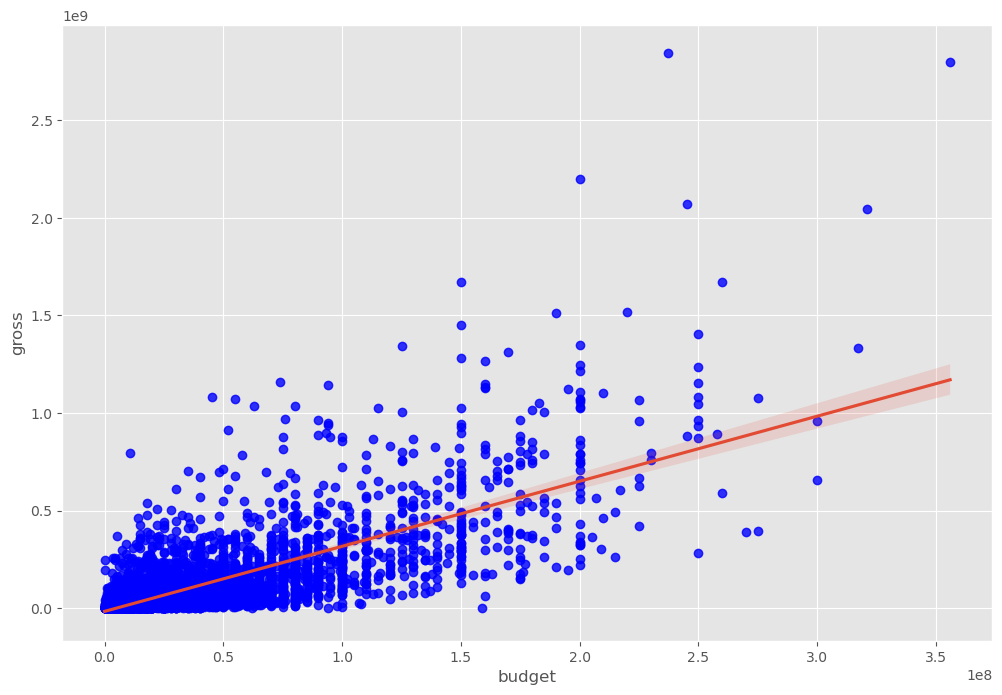

In [25]:
sns.regplot(x="budget",y="gross",data=df, scatter_kws={'color':'blue'})

In [26]:
#Correlation between score, votes, budget, gross and runtime.
All_correlation=df[['score','votes','budget','gross','runtime']].corr()
All_correlation

,score,votes,budget,gross,runtime
score,1.000000,0.455808,0.066443,0.211973,0.394589
votes,0.455808,1.000000,0.439675,0.614751,0.352303
budget,0.066443,0.439675,1.000000,0.740247,0.318695
gross,0.211973,0.614751,0.740247,1.000000,0.275796
runtime,0.394589,0.352303,0.318695,0.275796,1.000000


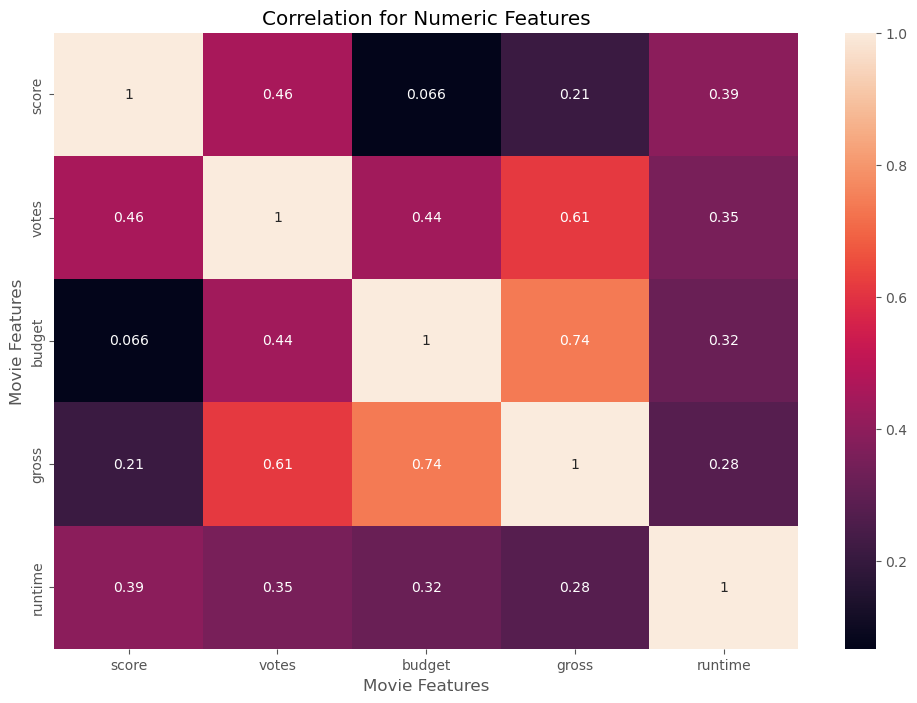

In [27]:
#Viewing the correlation with heatmap
sns.heatmap(All_correlation,annot=True)
plt.title('Correlation for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [28]:
#correlation pairs
corr_pairs=All_correlation.unstack()
sorted_pairs= corr_pairs.sort_values()
sorted_pairs

budget   score      0.066443
score    budget     0.066443
         gross      0.211973
gross    score      0.211973
runtime  gross      0.275796
gross    runtime    0.275796
budget   runtime    0.318695
runtime  budget     0.318695
         votes      0.352303
votes    runtime    0.352303
runtime  score      0.394589
score    runtime    0.394589
budget   votes      0.439675
votes    budget     0.439675
         score      0.455808
score    votes      0.455808
gross    votes      0.614751
votes    gross      0.614751
budget   gross      0.740247
gross    budget     0.740247
score    score      1.000000
budget   budget     1.000000
votes    votes      1.000000
gross    gross      1.000000
runtime  runtime    1.000000
dtype: float64

#### There is a high correlation between the gross column and the gross column. The implication beign that a high budget would most definitely result to a high gross income.

#### Also, the above analysis shows that votes affect the gross income. The higer the votes, the higher the gross most definitely.